

```
# This is formatted as code
```




Arewa Data Science Academy

Deep Learning Cohort2.0

Name: Abdulkadir Shehu Bichi

Email: abdulkadirshehubichi@gmail.com

Title: Week 2 Solution

Exercises Solution


In [1]:
# (1a) Load the Synchronous Machine Learning Dataset as Numpy array. ­

# import libraries
import zipfile
import pandas as pd
import numpy as np

# download dataset (if you're in Colab)
!wget "https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip" -O data.zip

# unzip data
with zipfile.ZipFile("data.zip", 'r') as my_zip:
    my_zip.extractall()

# read csv and parse to pandas
dataset_name = "synchronous machine.csv"  # make sure this matches the exact filename in the zip
try:
    data = pd.read_csv(dataset_name, delimiter=";", thousands=',')
    # get numpy data
    numpy_data = data.values
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"File '{dataset_name}' not found. Please check the exact filename in the extracted contents.")
    # List all files in current directory to help identify the correct filename
    import os
    print("\nAvailable files:")
    print(os.listdir())

--2025-02-07 18:49:56--  https://archive.ics.uci.edu/static/public/607/synchronous+machine+data+set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.zip’

data.zip                [ <=>                ]  14.37K  --.-KB/s    in 0.007s  

2025-02-07 18:49:56 (1.93 MB/s) - ‘data.zip’ saved [14713]

Data loaded successfully!


In [2]:
numpy_data

array([[   3,   66,   34,  383, 1563],
       [   3,   68,   32,  372, 1552],
       [   3,    7,    3,   36,  154],
       ...,
       [   6,   95,    5,   16,  134],
       [   6,   97,    3,   16,  134],
       [   6,   99,    1,   16,  134]])

In [3]:
#1 (b) Convert the Numpy array to PyTorch tensor, original data tensor.
import torch
torch.__version__
numpy_data
original_data_tensor = torch.from_numpy(numpy_data)
original_data_tensor

tensor([[   3,   66,   34,  383, 1563],
        [   3,   68,   32,  372, 1552],
        [   3,    7,    3,   36,  154],
        ...,
        [   6,   95,    5,   16,  134],
        [   6,   97,    3,   16,  134],
        [   6,   99,    1,   16,  134]])

In [4]:
 # 2(a) Print the size of the dataset.
 dataset_size = data.size
 dataset_size

2785

In [5]:
#2(b) Create a tensor, my pi tensor of same size as original data tensor containing values of 3.142 at
#every point and placed on your GPU device. Print the first 13 rows. Print tensor device location.
#Print tensor datatype.
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using GPU")
else:
    device = torch.device('cpu')
    print("Using CPU")
my_pi_tensor = torch.full_like(original_data_tensor, 3.142)
print("Tensor Device is: ", my_pi_tensor.device)
print("The first 13 rows :",my_pi_tensor[:13])
print("Tensor datatype :",my_pi_tensor.dtype)

Using GPU
Tensor Device is:  cpu
The first 13 rows : tensor([[3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3],
        [3, 3, 3, 3, 3]])
Tensor datatype : torch.int64


In [6]:
# 2(c) Print the fifth-root of the sum of all values in my pi tensor.
my_pi_tensor_sum = torch.sum(my_pi_tensor)
fifth_root = my_pi_tensor_sum.pow(1/5)
print("The fifth-root of the sum of all values in my pi tensor", fifth_root)
# Convert to scalar for readability
print("Sum of all values:", my_pi_tensor_sum.item())
print("Fifth root of the sum:", fifth_root.item())

The fifth-root of the sum of all values in my pi tensor tensor(6.0868)
Sum of all values: 8355
Fifth root of the sum: 6.086803436279297


In [7]:
#  2(d) Create a new tensor, my data tensor using the first and last 100 rows from the original data tensor.
# Print size of my data tensor [Expect a size of 200 rows].
first_100_row = original_data_tensor[:100]
last_100_row = original_data_tensor[-100:]
my_data_tensor = torch.cat((first_100_row, last_100_row), dim=0)
print("My data tensor size ", my_data_tensor.size())
my_data_tensor.size()


My data tensor size  torch.Size([200, 5])


torch.Size([200, 5])

In [8]:
# 2 (e) Create two 1-D tensors, features and target from my data tensor. The feature is dIf (Changing
#of excitation current of synchronous machine) I) column and target is If (Excitation current of
#synchronous machine). ­

# Extract feature (dIf) - Assuming it's the first column (index 0)
features = my_data_tensor[:, 0]

# Extract target (If) - Assuming it's the second column (index 1)
target = my_data_tensor[:, 1]

print("Features (dIf):", features)
print("Target (If):", target)
print(features.shape)  # Expected: (num_samples,)
print(target.shape)    # Expected: (num_samples,)

Features (dIf): tensor([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
        34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34,
        35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 55, 55, 55, 55, 55, 55, 55, 55,
        55, 55, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56,
        56, 56, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58,
        58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59,
        59, 59,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6])
Target (If): tensor([66, 68,  7, 72, 74, 76, 78,  8, 82, 84, 86, 88,  9, 92, 94, 96, 98

In [9]:
#2 (f) Split your data into training and test data of ratio 75:25 respectively

# Calculate split indices
total_samples = features.size(0)
train_size = int(total_samples * 0.75)
test_size = total_samples - train_size

# Random shuffling before splitting
indices = torch.randperm(total_samples)
features_shuffled = features[indices]
target_shuffled = target[indices]

# Split features
X_train = features_shuffled[:train_size]
X_test = features_shuffled[train_size:]

# Split target
y_train = target_shuffled[:train_size]
y_test = target_shuffled[train_size:]

print("Training features shape:", X_train.size())
print("Testing features shape:", X_test.size())
print("Training target shape:", y_train.size())
print("Testing target shape:", y_test.size())


Training features shape: torch.Size([150])
Testing features shape: torch.Size([50])
Training target shape: torch.Size([150])
Testing target shape: torch.Size([50])


In [20]:
# Question 3. Define your Linear model structure. You can use existing model.
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = LinearRegressionModel(input_dim=1)

# Print model summary
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Epoch | Training Loss | Testing Loss
----------------------------------------
    0 |     1.825195 |    1.672777
   10 |     1.594935 |    1.465973
   20 |     1.409644 |    1.303596
   30 |     1.268921 |    1.184289
   40 |     1.167088 |    1.101671
   50 |     1.095572 |    1.046887
   60 |     1.045921 |    1.011551
   70 |     1.011643 |    0.989391
   80 |     0.988339 |    0.976235
   90 |     0.972978 |    0.969236


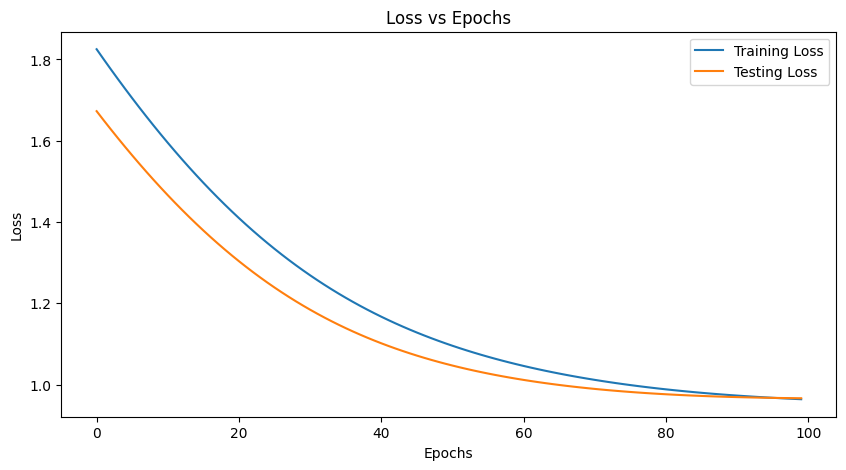


Final Losses:
Training Loss: 0.964039
Testing Loss: 0.966445


In [24]:
# Question 4. Train model for any number of epochs. Generate 1 plot of Loss against Epoch during model
# training and testing. Choose any set of hyperparameters for model training.

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Ensure inputs are float tensors and reshaped
X_train = X_train.float().view(-1, 1)
y_train = y_train.float().view(-1, 1)
X_test = X_test.float().view(-1, 1)
y_test = y_test.float().view(-1, 1)

# Normalize features and targets
def normalize(tensor):
    mean = tensor.mean()
    std = tensor.std()
    return (tensor - mean) / std, mean, std

# Normalize training and test data
X_train_normalized, X_train_mean, X_train_std = normalize(X_train)
y_train_normalized, y_train_mean, y_train_std = normalize(y_train)
X_test_normalized, _, _ = normalize(X_test)
y_test_normalized, _, _ = normalize(y_test)

# Model, Loss, and Optimizer
model = LinearRegressionModel(input_dim=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Using Adam optimizer

# Training parameters
num_epochs = 100
train_losses = []
test_losses = []

# Training loop
print("Epoch | Training Loss | Testing Loss")
print("-" * 40)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    train_outputs = model(X_train_normalized)
    train_loss = criterion(train_outputs, y_train_normalized)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Testing phase
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_normalized)
        test_loss = criterion(test_outputs, y_test_normalized)
        test_losses.append(test_loss.item())

    # Print losses every 10 epochs
    if epoch % 10 == 0:
        print(f"{epoch:5d} | {train_loss.item():12.6f} | {test_loss.item():11.6f}")

# Final plotting
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print final losses
print("\nFinal Losses:")
print(f"Training Loss: {train_losses[-1]:.6f}")
print(f"Testing Loss: {test_losses[-1]:.6f}")

# Optional: Denormalize predictions for interpretation
def denormalize(normalized_tensor, original_mean, original_std):
    return normalized_tensor * original_std + original_mean

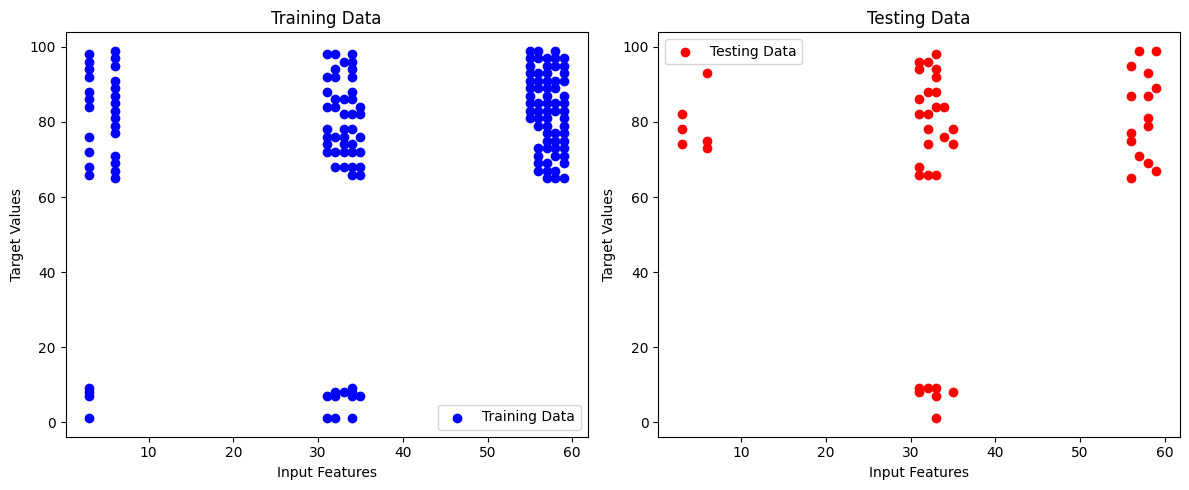

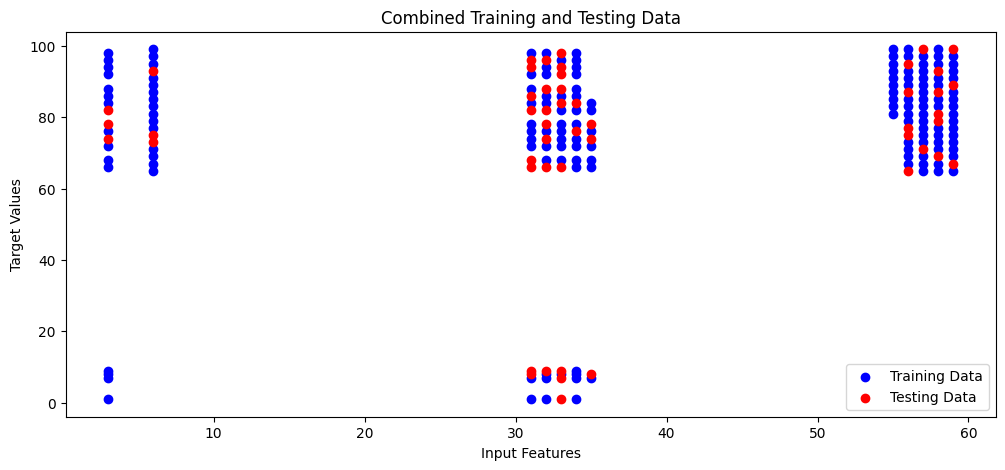

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training data
plt.subplot(121)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.title('Training Data')
plt.xlabel('Input Features')
plt.ylabel('Target Values')
plt.legend()

# Plot testing data
plt.subplot(122)
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.title('Testing Data')
plt.xlabel('Input Features')
plt.ylabel('Target Values')
plt.legend()

plt.tight_layout()
plt.show()

# Additional detailed visualization
plt.figure(figsize=(12, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.title('Combined Training and Testing Data')
plt.xlabel('Input Features')
plt.ylabel('Target Values')
plt.legend()
plt.show()

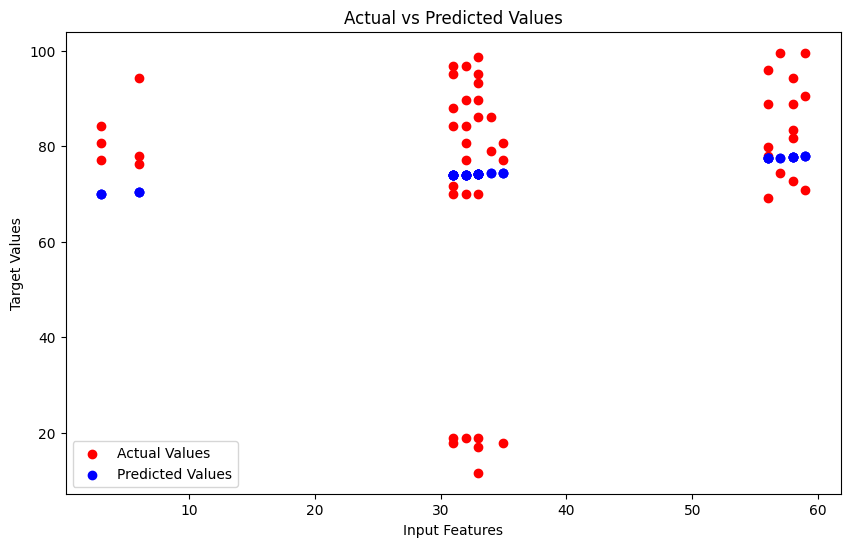

Mean Squared Error: 604.0176

Sample Predictions:
Actual: 18.7800, Predicted: 74.1973
Actual: 11.5948, Predicted: 74.1973
Actual: 89.7339, Predicted: 74.0544
Actual: 76.2617, Predicted: 70.3404
Actual: 99.6136, Predicted: 77.6256
Actual: 78.9561, Predicted: 74.3401
Actual: 98.7155, Predicted: 74.1973
Actual: 96.9192, Predicted: 74.0544
Actual: 71.7709, Predicted: 73.9116
Actual: 93.3266, Predicted: 74.1973
Actual: 77.1598, Predicted: 74.0544
Actual: 17.8818, Predicted: 73.9116
Actual: 16.9837, Predicted: 74.1973
Actual: 86.1413, Predicted: 74.3401
Actual: 88.8358, Predicted: 77.7684
Actual: 17.8818, Predicted: 74.4829
Actual: 80.7524, Predicted: 74.0544
Actual: 77.1598, Predicted: 74.4829
Actual: 95.1228, Predicted: 74.1973
Actual: 88.8358, Predicted: 77.4827


In [26]:
# Make predictions
model.eval()
with torch.no_grad():
    # Predictions on normalized test data
    y_preds_normalized = model(X_test_normalized)

    # Denormalize predictions
    y_preds = denormalize(y_preds_normalized, y_train_mean, y_train_std)
    y_actual = denormalize(y_test_normalized, y_train_mean, y_train_std)

# Visualization of predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_actual, color='red', label='Actual Values')
plt.scatter(X_test, y_preds, color='blue', label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Input Features')
plt.ylabel('Target Values')
plt.legend()
plt.show()

# Calculate Mean Squared Error
mse = torch.mean((y_preds - y_actual)**2)
print(f"Mean Squared Error: {mse.item():.4f}")

# Optional: Print some sample predictions
print("\nSample Predictions:")
for i in range(min(20, len(y_preds))):
    print(f"Actual: {y_actual[i].item():.4f}, Predicted: {y_preds[i].item():.4f}")

In [27]:
#Question 5. Briefly comment on your results. What could be done to make the model or prediction
#better? (< 60 words)

#The model shows inconsistent performance with high variance between training and test losses. To improve:

# 1.Implement regularization techniques
# 2. Try different learning rates
# 3. Use more advanced optimizers like Adam
# 4. Perform feature scaling/normalization